In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot 
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv("/content/ToyotaCorolla.csv", encoding="ISO-8859-1")
cols_needed = ["Price", "Age_08_04","KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
raw_data = raw_data[(cols_needed)]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


EDA:

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [4]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [5]:
raw_data.skew()

Price             1.703885
Age_08_04        -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

In [6]:
raw_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


Visualizing the correlation

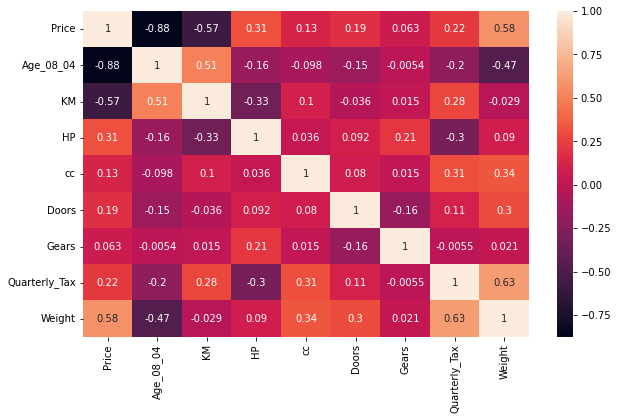

In [7]:
fig, ax = plt.subplots(figsize=(10,6))  
sns.heatmap(raw_data.corr(), annot=True , ax=ax)

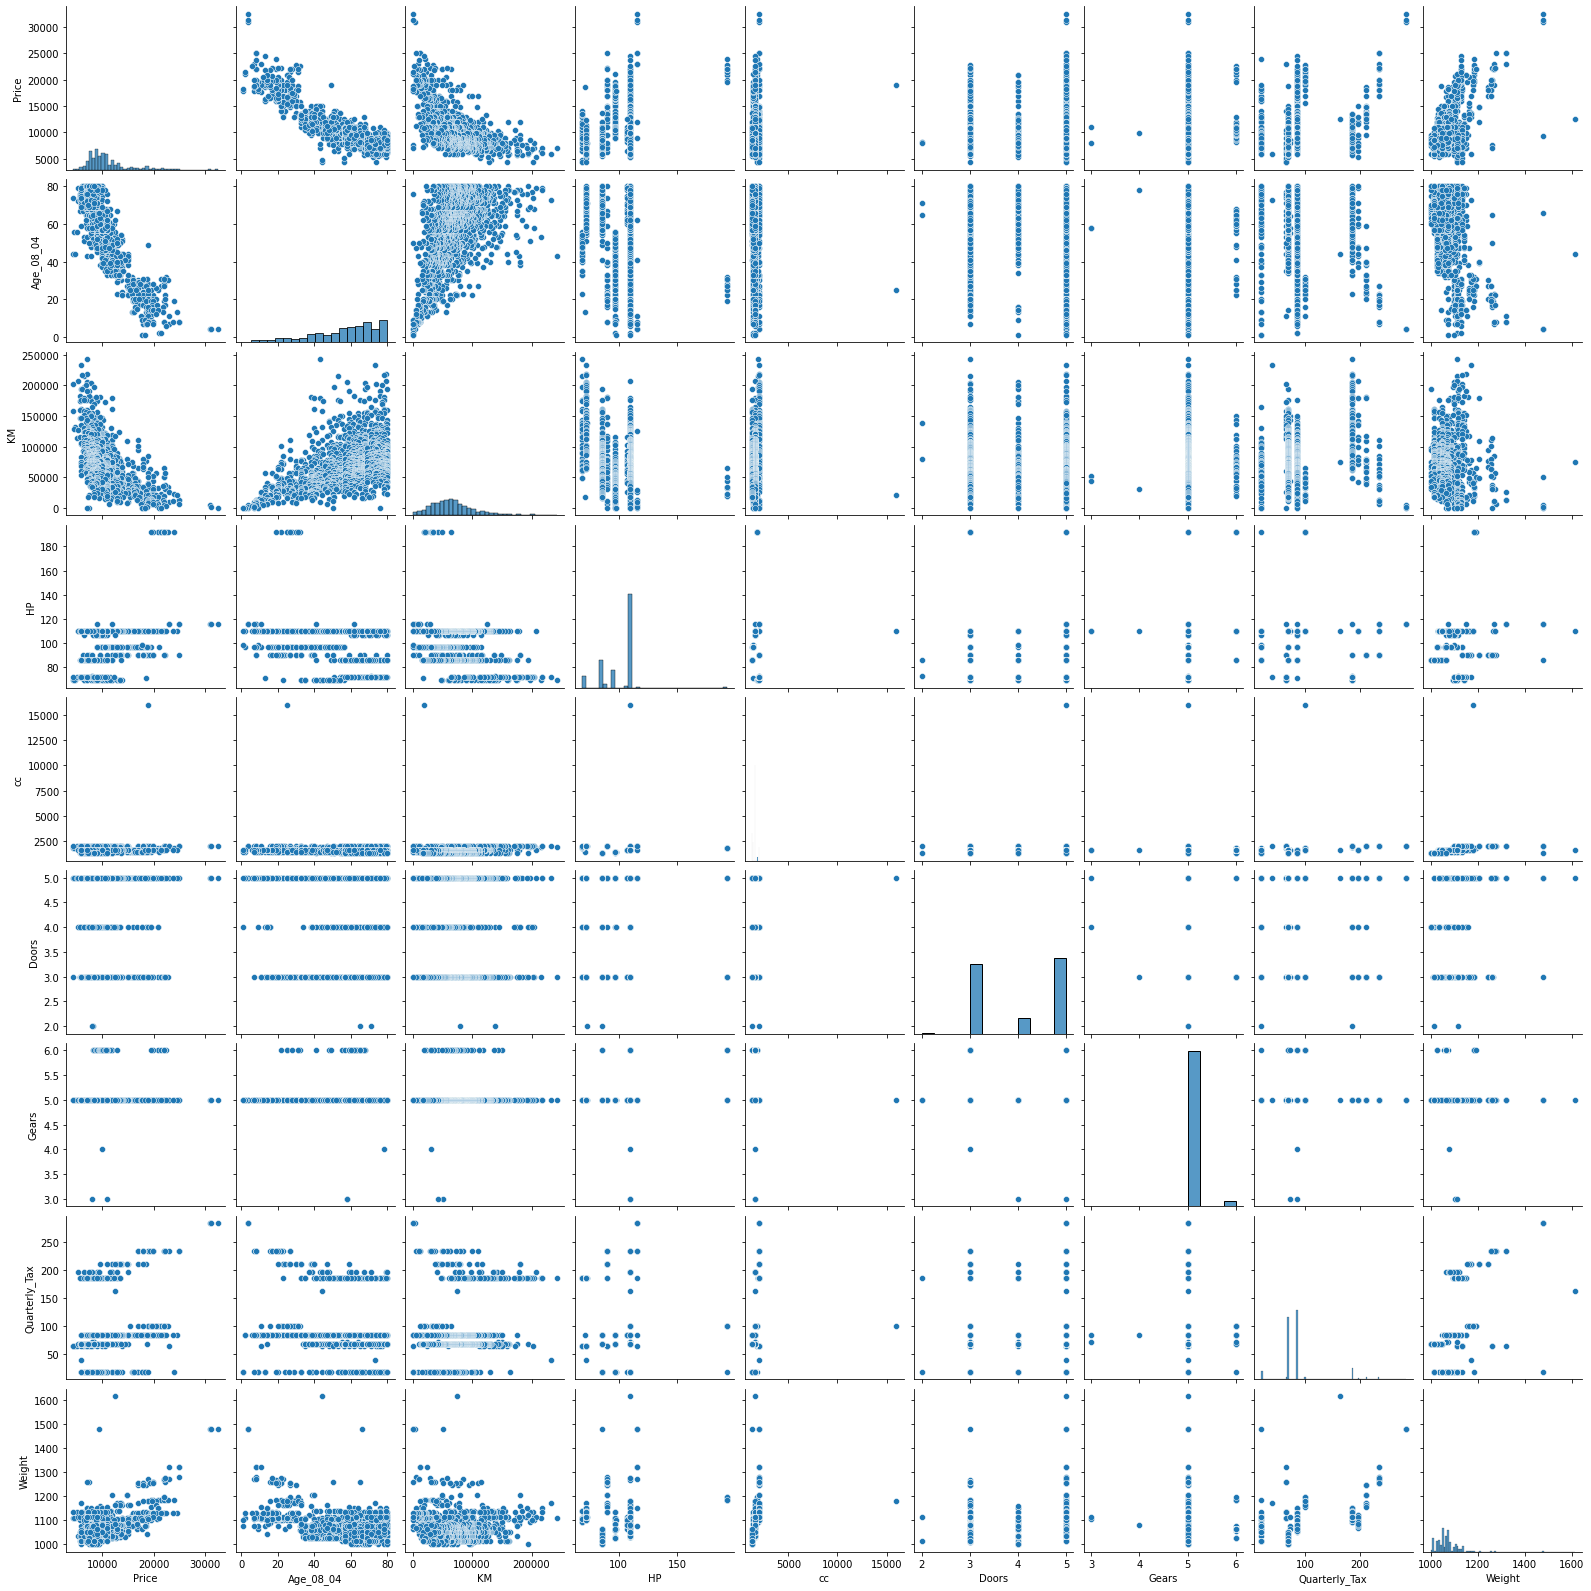

In [8]:
sns.pairplot(raw_data)

Preparing Model

In [9]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=raw_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:26:52   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation: The the p-values of the features CC & Doors are higher than 0.05 & therefore there is a weak evidence to reject the null hypothesis.

Checking the pvalues of these features individualy:

In [10]:
model_cc = smf.ols("Price~cc", data=raw_data).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.55e-06
Time:                        16:27:57   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model_doors = smf.ols("Price~Doors", data= raw_data).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.46e-12
Time:                        16:28:07   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation: Both the features, CC & Doors do not make quite a difference to the model

Making a model without the Features CC & Door:

In [12]:
model_2 = smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", data=raw_data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:28:34   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age_08_04      -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating the VIF to check if there is any data which is causing Multi-collinearity:

In [13]:
# to calculate VIF
def vif_calc(x):
    if x != 1:
        x = 1/(1-x)
        return x
    else:
        return 0       

In [14]:
rsq_age = smf.ols("Age_08_04~KM+HP+Gears+Quarterly_Tax+Weight", data=raw_data).fit().rsquared
vif_age = vif_calc(rsq_age)

rsq_km = smf.ols("KM~+HP+Gears+Quarterly_Tax+Weight+Age_08_04", data=raw_data).fit().rsquared
vif_km = vif_calc(rsq_km)

rsq_hp = smf.ols("HP~+KM+Gears+Quarterly_Tax+Weight+Age_08_04", data=raw_data).fit().rsquared
vif_hp = vif_calc(rsq_hp)

rsq_gears = smf.ols("Gears~+HP+KM+Quarterly_Tax+Weight+Age_08_04", data=raw_data).fit().rsquared
vif_gears = vif_calc(rsq_gears)

rsq_quat_tax = smf.ols("Quarterly_Tax~+HP+Gears+KM+Weight+Age_08_04", data=raw_data).fit().rsquared
vif_quat_tax = vif_calc(rsq_quat_tax)

rsq_weight = smf.ols("Weight~+HP+Gears+KM+Quarterly_Tax+Age_08_04", data=raw_data).fit().rsquared
vif_weight = vif_calc(rsq_weight)

# Making a Dataframe
vif_dict = {"Features": ["Weight","HP","Gears","KM","Quarterly_Tax","Age_08_04"],
           "VIF": [vif_weight,vif_hp,vif_gears,vif_km,vif_quat_tax,vif_age]}

vif_box = pd.DataFrame(vif_dict)
vif_box

,Features,VIF
0,Weight,2.297072
1,HP,1.400460
2,Gears,1.058932
3,KM,1.746492
4,Quarterly_Tax,2.263600
5,Age_08_04,1.884335


Observation: The VIF shouldn't be more than 20, since VIF of all the features are below 5 and therefore there is no problem of multi-collinearity

Making a QQ plot to check Normal Distribution:

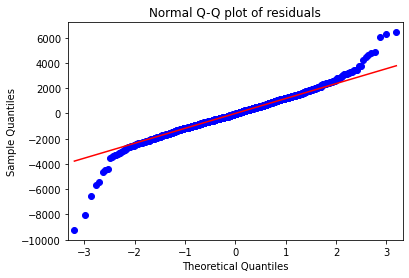

In [15]:
qqplot=sm.qqplot(model_2.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

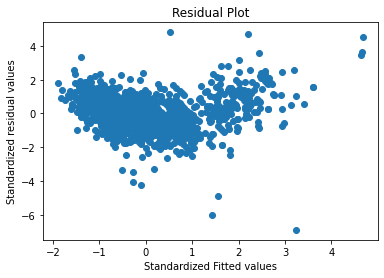

In [17]:
plt.scatter(get_standardized_values(model_2.fittedvalues),
            get_standardized_values(model_2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [18]:
model_influence = model_2.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-19-4d06979d9bb0>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(raw_data)), np.round(c, 3))


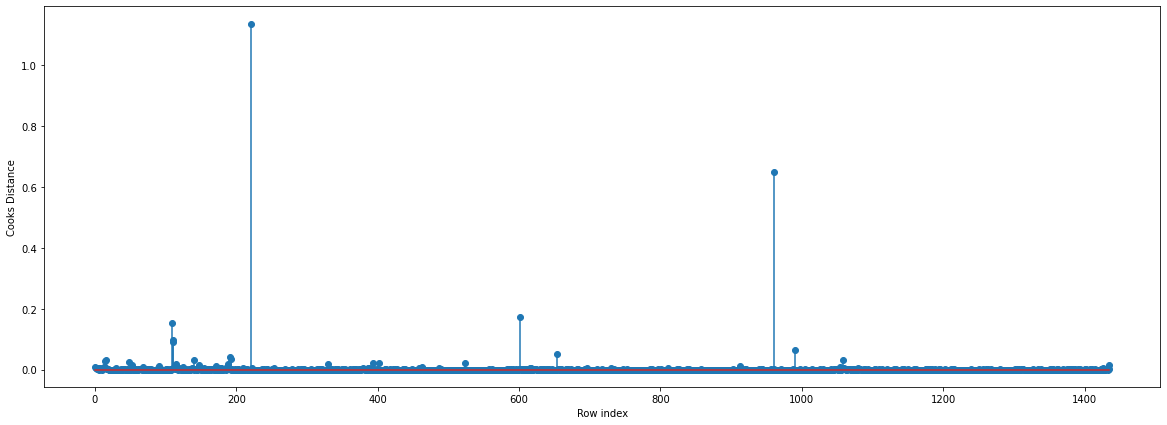

In [19]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(raw_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

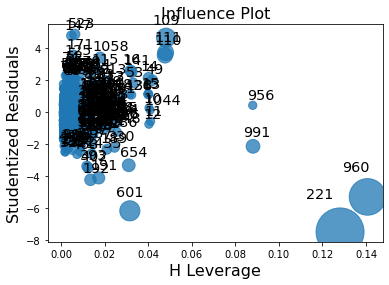

In [20]:
influence_plot(model_2)
plt.show()

In [21]:
k = raw_data.shape[1]
n = raw_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

Observation: The 221st row is highly influencing the data.

In [22]:
raw_data[raw_data.index.isin([221])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,1600,5,5,163,1615


In [23]:
raw_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [24]:

raw_data.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [25]:
# removing the 221st row
data = raw_data.copy()
data = data.drop(data.index[[221]], axis=0).reset_index()
data

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [26]:
# Removing the index column
data=data.drop(['index'],axis=1)

In [27]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


Making a model without the influencing data:

In [28]:
model_3 = smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", data=data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1575.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:33:08   Log-Likelihood:                -12341.
No. Observations:                1435   AIC:                         2.470e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8341.5880   1433.844     -5.818      0.000   -1.12e+04   -5528.922
Age_08_04      -119.0012      2.591    -45.925      0.000    -124.084    -113.918
KM               -0.0212      0.001    -17.259      0.000      -0.024      -0.019
HP               29.5366      2.757     10.713      0.000      24.128      34.945
Gears           606.8629    189.809      3.197      0.001     234.528     979.198
Quarterly_Tax     1.9008      1.295      1.467      0.142      -0.640       4.442
Weight           19.5561      1.070     18.279      0.000      17.457      21.655
==============================================================================
Omnibus:                      130.086   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.019
Skew:                          -0.196   Prob(JB):                    2.71e-157
Kurtosis:                       6.450   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

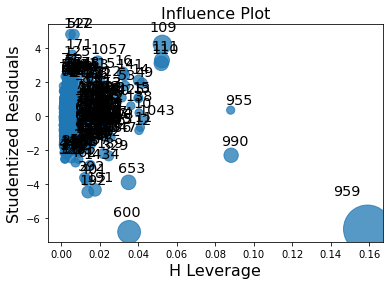

In [29]:
influence_plot(model_3)
plt.show()

In [30]:
data1 = data.drop(data.index[[959]], axis=0).reset_index()
data1=data1.drop(['index'],axis=1)

In [31]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [32]:
model_4 = smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight", data=data1).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1630.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:33:42   Log-Likelihood:                -12311.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1427   BIC:                         2.467e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.128e+04   1480.695     -7.620      0.000   -1.42e+04   -8378.474
Age_08_04      -116.0961      2.590    -44.818      0.000    -121.177    -111.015
KM               -0.0215      0.001    -17.772      0.000      -0.024      -0.019
HP               26.2236      2.762      9.495      0.000      20.806      31.641
Gears           638.5439    187.075      3.413      0.001     271.572    1005.516
Quarterly_Tax    -0.7390      1.337     -0.553      0.581      -3.361       1.883
Weight           22.5545      1.147     19.664      0.000      20.305      24.804
==============================================================================
Omnibus:                      129.871   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.486
Skew:                          -0.215   Prob(JB):                    3.49e-152
Kurtosis:                       6.389   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation: The pvalue of Quaterly tax is abouve 0.05 therefore it can be removed to improve our model

Making a model after removing the Quaterly_Tax feature:

In [33]:
model_5 = smf.ols("Price~Age_08_04+KM+HP+Gears+Weight", data=data1).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1957.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:34:03   Log-Likelihood:                -12311.
No. Observations:                1434   AIC:                         2.463e+04
Df Residuals:                    1428   BIC:                         2.467e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.091e+04   1314.819     -8.295      0.000   -1.35e+04   -8327.782
Age_08_04   -116.1091      2.590    -44.836      0.000    -121.189    -111.029
KM            -0.0216      0.001    -18.390      0.000      -0.024      -0.019
HP            26.8582      2.511     10.694      0.000      21.932      31.785
Gears        631.9932    186.654      3.386      0.001     265.847     998.139
Weight        22.1246      0.843     26.250      0.000      20.471      23.778
==============================================================================
Omnibus:                      123.801   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.929
Skew:                          -0.190   Prob(JB):                    1.22e-141
Kurtosis:                       6.274   Cond. No.                     3.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

observation: The adjusted rsquared of this model is better than the previous one.

In [34]:
# Making a data frame to check which model is the best

model_dict = {
    "Model": ["model", "model_2", "model_3", "model_4", "model_5"],
    "Model Info": ["All features", "excluding cc & Doors", 
                   "removing the influential data row",
                  "removing another influential data row", 
                  "removing the Quaterly_tax feature"],
    
    "rsquared": [model.rsquared, model_2.rsquared, 
                 model_3.rsquared, model_4.rsquared,
                 model_5.rsquared],
    "Adj rsquared": [model.rsquared_adj, model_2.rsquared_adj, 
                 model_3.rsquared_adj, model_4.rsquared_adj,
                 model_5.rsquared_adj],
    "AIC": [model.aic, model_2.aic, 
                 model_3.aic, model_4.aic,
                 model_5.aic]
}

model_check = pd.DataFrame(model_dict)
model_check

,Model,Model Info,rsquared,Adj rsquared,AIC
0,model,All features,0.863763,0.862999,24769.076640
1,model_2,excluding cc & Doors,0.863590,0.863017,24766.894177
2,model_3,removing the influential data row,0.868740,0.868188,24695.211929
3,model_4,removing another influential data row,0.872654,0.872118,24635.465221
4,model_5,removing the Quaterly_tax feature,0.872626,0.872180,24633.772252


Conclusion: model 5 is the best model as the adj rsqaured and AIC are better than other models